### **Load data**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
data = np.genfromtxt('HousePricing.csv',dtype=float,delimiter=',')
data

array([[6.71, 9.12],
       [1.2 , 2.43],
       [1.86, 2.91],
       [2.09, 3.41],
       [3.05, 4.71],
       [4.69, 5.94],
       [3.57, 5.4 ],
       [5.55, 7.04],
       [2.39, 3.38],
       [3.94, 5.29]])

### **Split data for training/testing**

In [3]:
X = data[:,0]
Y = data[:,1]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train.shape

(6,)

In [5]:
X_test.shape

(4,)

### **Build model**
Recap: 
1. Sẽ randomly hai trọng số a và b trong phương trình: 
y = a*x + b
- x là data feature
- y là kết quả dự đoán

2. Tính hàm loss: 
- y_hat = a*x+b
- loss = (y_hat - y)^2

3. Cập nhật trọng số a và b:
- da = 2* y_hat * x
- db = 2* y_hat
- a-= lr*da
- b-= lr*db

### **Model Gradient Descent**
Là chiến lược cập nhật trọng số sau mỗi lần chạy qua full dataset. 


In [12]:
class LinearRegression_GradientDescent:
    def __init__(self,lr=0.01,n_epoch=1000):
        self.lr=lr
        self.n_epoch=n_epoch
        self.a = random.random() - 0.5
        self.b = random.random() - 0.5
    def fit(self, X,Y):
        N = len(X) # number of samples
        for i in range(self.n_epoch):
            y_hat = self.a*X + self.b
            f = y_hat - Y
            loss = np.sum(f**2)/N
            # Updating m and b
            self.a -= self.lr * (2 * X.dot(f).sum() / N)
            self.b -= self.lr * (2 * f.sum() / N)
            print("Epoch",i+1,",loss",loss)

                    
        


In [13]:
model = LinearRegression_GradientDescent()
model.fit(X_train, y_train)
model.a


Epoch 1 ,loss 18.747415159858225
Epoch 2 ,loss 10.05885620880723
Epoch 3 ,loss 5.450649822067494
Epoch 4 ,loss 3.0063730817490373
Epoch 5 ,loss 1.7096920369992368
Epoch 6 ,loss 1.0216156867070587
Epoch 7 ,loss 0.6563016628722121
Epoch 8 ,loss 0.46215956557890087
Epoch 9 ,loss 0.35879665739689254
Epoch 10 ,loss 0.3035783598118226
Epoch 11 ,loss 0.27389432707419326
Epoch 12 ,loss 0.25775363742057694
Epoch 13 ,loss 0.24879715370857725
Epoch 14 ,loss 0.2436524354600861
Epoch 15 ,loss 0.2405309729860348
Epoch 16 ,loss 0.23848426047994434
Epoch 17 ,loss 0.2370092702798733
Epoch 18 ,loss 0.23583922457368642
Epoch 19 ,loss 0.23483263564377824
Epoch 20 ,loss 0.2339144607317991
Epoch 21 ,loss 0.23304489477846457
Epoch 22 ,loss 0.2322028203198261
Epoch 23 ,loss 0.23137703049325956
Epoch 24 ,loss 0.23056157434609414
Epoch 25 ,loss 0.2297532883193545
Epoch 26 ,loss 0.22895048712276056
Epoch 27 ,loss 0.22815226946810618
Epoch 28 ,loss 0.22735814987964165
Epoch 29 ,loss 0.22656786343242405
Epoch 30 ,

1.1249386706168938

### **Plot line result**

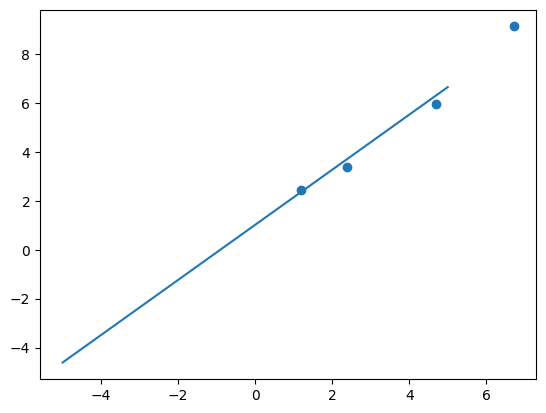

In [14]:
plt.scatter(X_test,y_test)

x = np.linspace(-5, 5, 100)
y=model.a*x+model.b
plt.plot(x,y)

plt.show()

### **Model Stochastic Gradient Descent (SGD)**
Là chiến lược cập nhật trọng số sau mỗi lần chạy qua 1 hoặc một vài mẫu data. 

In [24]:
class LinearRegression_SGD:
    def __init__(self,lr=0.01,n_epoch=1000,batch_size=1):
        self.lr=lr
        self.n_epoch=n_epoch
        self.a = random.random() - 0.5
        self.b = random.random() - 0.5
        self.batch_size = batch_size
    def fit(self, X,Y):
        for i in range(self.n_epoch):
            indexes = np.random.randint(0, len(X), self.batch_size) # random sample
            Xs = np.take(X, indexes)
            Ys = np.take(Y, indexes)
            N = len(Xs)
            y_hat = self.a*Xs + self.b
            f = y_hat - Ys
            loss = np.sum(f**2)/N
            # Updating m and b
            self.a -= self.lr * (2 * Xs.dot(f).sum() / N)
            self.b -= self.lr * (2 * f.sum() / N)
            print("Epoch",i+1,",loss",loss)

                    
        


In [27]:
model = LinearRegression_SGD()
model.fit(X_train, y_train)
model.a


Epoch 1 ,loss 8.940801535754407
Epoch 2 ,loss 2.917934335935694
Epoch 3 ,loss 6.87494738359976
Epoch 4 ,loss 0.3592618680965405
Epoch 5 ,loss 0.648816380763492
Epoch 6 ,loss 0.9665712480850099
Epoch 7 ,loss 0.6092845680170518
Epoch 8 ,loss 0.38406655025090913
Epoch 9 ,loss 0.00031322493413403783
Epoch 10 ,loss 0.02311705862250354
Epoch 11 ,loss 0.001381973562835582
Epoch 12 ,loss 0.29013145816907
Epoch 13 ,loss 0.1525432611613085
Epoch 14 ,loss 0.4034164979302439
Epoch 15 ,loss 0.13363187187224182
Epoch 16 ,loss 0.006709245202545411
Epoch 17 ,loss 0.015484068409350807
Epoch 18 ,loss 0.10842193125162664
Epoch 19 ,loss 0.08639087661466606
Epoch 20 ,loss 0.22187712016003777
Epoch 21 ,loss 0.2710264680749186
Epoch 22 ,loss 0.17084332360328078
Epoch 23 ,loss 0.2563360864100142
Epoch 24 ,loss 0.033954176112275754
Epoch 25 ,loss 0.3315068302472878
Epoch 26 ,loss 0.20896751922022444
Epoch 27 ,loss 0.07022035832809512
Epoch 28 ,loss 0.1274365441677909
Epoch 29 ,loss 0.0007544680949666394
Epoch 

1.0818132548517743

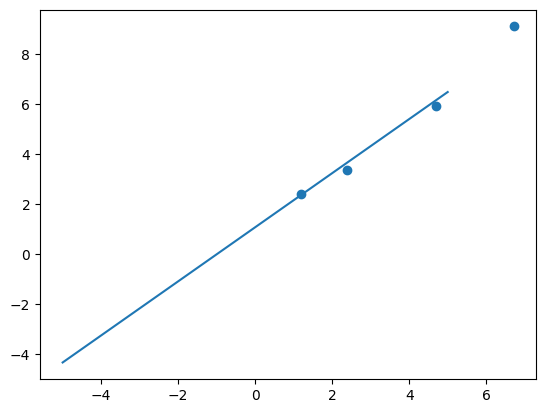

In [29]:
plt.scatter(X_test,y_test)

x = np.linspace(-5, 5, 100)
y=model.a*x+model.b
plt.plot(x,y)

plt.show()